# Rain in Australia

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


# Exibindo o dataset

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [3]:
'Linhas: {} | Colunas: {}'.format(data.shape[0], data.shape[1])

'Linhas: 142193 | Colunas: 24'

# Removendo dados nulos

In [4]:
data = data.dropna()
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
5945,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,0.0,No
5946,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,0.0,No
5947,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,...,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,0.0,No
5948,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,0.0,No
5949,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,...,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,No,0.0,No


In [5]:
'Linhas: {} | Colunas: {}'.format(data.shape[0], data.shape[1])

'Linhas: 56420 | Colunas: 24'

# Verificando balanceamento dos dados

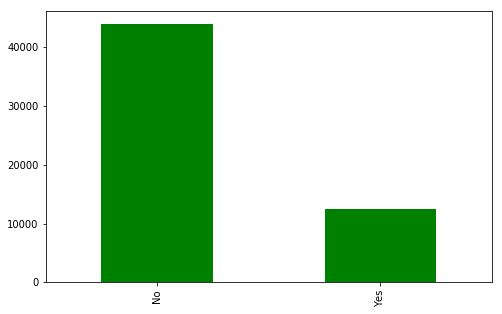

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))

counts = data['RainTomorrow'].value_counts()
counts.plot.bar(color='green', ax=ax, grid=False)

In [7]:
rain_tomorrow = list(data.RainTomorrow)

yes, no = 0, 0

for instance in rain_tomorrow:
    if (instance == "Yes"):
        yes += 1
    no += 1
    
print("yes:", yes)
print("no:", no)

yes: 12427
no: 56420


# Lidando com variáveis categóricas

In [8]:
# Antes da transformação

print('Wind gust direction:')
data.WindGustDir.unique()

Wind gust direction:


array(['SSW', 'S', 'NNE', 'WNW', 'N', 'SE', 'ENE', 'NE', 'E', 'SW', 'W',
       'WSW', 'NNW', 'ESE', 'SSE', 'NW'], dtype=object)

In [9]:
# Antes da transformação

print('Wind gust direction at 9am:')
data.WindDir9am.unique()

Wind gust direction at 9am:


array(['ENE', 'SSE', 'NNE', 'WNW', 'NW', 'N', 'S', 'SE', 'NE', 'W', 'SSW',
       'E', 'NNW', 'ESE', 'WSW', 'SW'], dtype=object)

In [10]:
# Antes da transformação

print('Rain Today:')
data.RainToday.unique()

Rain Today:


array(['No', 'Yes'], dtype=object)

In [11]:
# Antes da transformação

print('Rain Tomorrow:')
data.RainTomorrow.unique()

Rain Tomorrow:


array(['No', 'Yes'], dtype=object)

In [12]:
label_encoder = LabelEncoder()

data.WindGustDir = label_encoder.fit_transform(data.WindGustDir)
data.WindDir9am = label_encoder.fit_transform(data.WindDir9am)
data.RainToday = label_encoder.fit_transform(data.RainToday)
data.RainTomorrow = label_encoder.fit_transform(data.RainTomorrow)

In [13]:
# Depois da transformação

print('Wind gust direction:')
data.WindGustDir.unique()

Wind gust direction:


array([11,  8,  5, 14,  3,  9,  1,  4,  0, 12, 13, 15,  6,  2, 10,  7])

In [14]:
# Depois da transformação

print('Wind gust direction at 9am:')
data.WindDir9am.unique()

Wind gust direction at 9am:


array([ 1, 10,  5, 14,  7,  3,  8,  9,  4, 13, 11,  0,  6,  2, 15, 12])

In [15]:
# Depois da transformação

print('Rain today:')
data.RainToday.unique()

Rain today:


array([0, 1])

In [16]:
# Depois da transformação

print('Rain tomorrow:')
data.RainTomorrow.unique()

Rain tomorrow:


array([0, 1])

# Dataset após tratamento de variáveis categóricas

In [17]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0.0,0
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0.0,0
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0.0,0
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0.0,0
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0.0,0
5945,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,3,43.0,3,...,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,0,0.0,0
5946,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,11,41.0,8,...,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,0,0.0,0
5947,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,9,37.0,9,...,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,0,0.0,0
5948,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,1,48.0,1,...,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,0,0.0,0
5949,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,4,41.0,5,...,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,0,0.0,0


# Padronizando dados

In [27]:
scaler = StandardScaler()

x_train = data[[
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm',
    'RISK_MM',
]]

scaled = scaler.fit_transform(x_train)

In [28]:
names = [
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm',
    'RISK_MM',
]
date = list(data.Date)
raintd = list(data.RainToday)
raintm = list(data.RainTomorrow)
data_scaled = pd.DataFrame(scaled, columns=names)
data_scaled.insert(0, 'Date', date)
data_scaled.insert(15, 'RainToday', raintd)
data_scaled.insert(16, 'RainTomorrow', raintm)
data_scaled.head(10)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,RainToday,RainTomorrow
0,2009-01-01,0.691208,1.575298,-0.303702,1.757691,1.214537,0.534126,-1.812261,-1.583303,-1.513002,-0.801428,0.254411,1.278186,1.563621,-0.268783,0,0
1,2009-01-02,0.769131,0.671504,-0.303702,2.515216,1.400800,-0.290764,-2.059824,-0.628068,-0.392322,-1.158937,-1.256603,0.318980,0.627467,-0.268783,0,0
2,2009-01-04,0.924976,1.919600,-0.303702,1.433038,0.762183,0.384146,-1.366647,-0.714907,-0.814396,-1.158937,0.632165,1.597921,1.783032,-0.268783,0,0
3,2009-01-05,1.314588,2.034368,-0.303702,1.595364,1.187928,-0.740704,-1.366647,-0.657014,-0.828951,-1.158937,0.254411,1.658823,1.885424,-0.268783,0,0
4,2009-01-06,1.673032,2.407362,-0.303702,1.541255,0.176784,-0.440744,-1.713236,-0.946479,-1.076373,-1.158937,0.632165,2.343970,2.177972,-0.268783,0,0
5,2009-01-07,2.124982,1.704411,-0.303702,2.028236,-2.058376,0.159176,-1.515185,-1.380677,-1.076373,1.343622,1.387672,1.902431,1.695268,-0.268783,0,0
6,2009-01-08,1.532771,1.403147,-0.303702,1.162493,1.294364,0.009196,-1.713236,-0.859640,-0.712516,-0.443920,-1.256603,1.034578,1.285700,-0.268783,0,0
7,2009-01-09,0.410687,1.431838,-0.303702,2.461107,1.454018,-0.290764,-2.010312,-0.570175,-0.814396,-1.158937,-1.256603,0.379882,1.475856,-0.268783,0,0
8,2009-01-10,0.862638,1.618336,-0.303702,1.757691,1.214537,0.534126,-1.069571,-1.293837,-1.571219,-1.158937,0.254411,0.790970,1.548993,-0.268783,0,0
9,2009-01-11,0.971729,1.618336,-0.303702,1.487147,1.320973,0.009196,-1.762748,-1.351730,-1.309242,-1.158937,0.254411,0.882323,1.592876,-0.268783,0,0


# Resampling

Class 0: 43993
Class 1: 12427
Proportion: 3.54 : 1


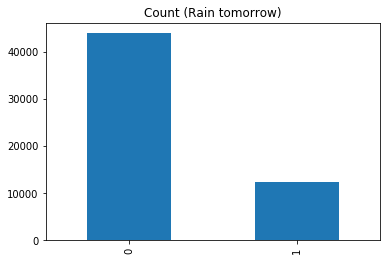

In [30]:
target_count = data_scaled.RainTomorrow.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (Rain tomorrow)');

# Random under-sampling

In [37]:
# Contando as classes
count_class_0, count_class_1 = data_scaled.RainTomorrow.value_counts()

# Divide por classes
df_class_0 = data_scaled[data_scaled['RainTomorrow'] == 0]
df_class_1 = data_scaled[data_scaled['RainTomorrow'] == 1]

Random under-sampling:
1    12427
0    12427
Name: RainTomorrow, dtype: int64


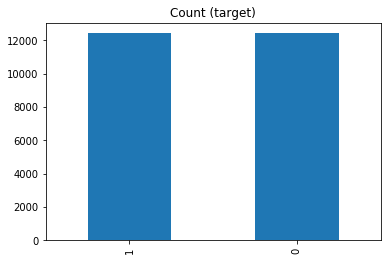

In [38]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.RainTomorrow.value_counts())

# 'df_test_under' é nosso novo dataset com
# instâncias igualadas pela classe minoritária
df_test_under.RainTomorrow.value_counts().plot(kind='bar', title='Count (target)');

# Random over-sampling

Random over-sampling:
1    43993
0    43993
Name: RainTomorrow, dtype: int64


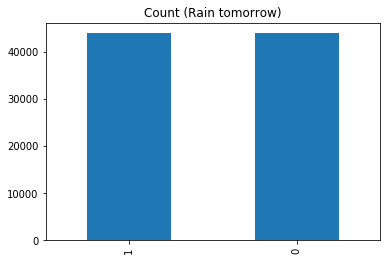

In [39]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.RainTomorrow.value_counts())

# 'df_test_over' é nosso novo dataset com
# instâncias igualadas pela classe majoritária
df_test_over.RainTomorrow.value_counts().plot(kind='bar', title='Count (Rain tomorrow)');

# Treinando MLP

In [40]:
# Implementando duas MLP's com as seguintes configurações:

# ========= MLP 1 ========= 
# input layer com 2 perceptrons
# hidden layer com 2 camadas de 4 perceptrons
# função ReLU
# outut layer com 1 perceptron

# ========= MLP 2 ========= 
# input layer com 2 perceptrons
# hidden layer com 2 camadas de 3 perceptrons
# função Sigmoid
# outut layer com 1 perceptron

# Vamos treinar as duas para cada novo dataset gerado

# MLP 1

In [44]:
'Linhas: {} | Colunas: {}'.format(df_test_under.shape[0], df_test_under.shape[1])

'Linhas: 24854 | Colunas: 17'

In [45]:
X = df_test_under.loc[:,[
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm',
    'RISK_MM'
]]
y = df_test_under.loc[:,['RainTomorrow']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [47]:
classifier = Sequential()

classifier.add(
    Dense(
        units=2,
        activation='relu',
        kernel_initializer='random_normal',
        input_dim=X_train.shape[-1]
    )
)

classifier.add(
    Dense(
        units=4,
        activation='relu',
        kernel_initializer='random_normal',
    )
)

classifier.add(
    Dense(
        units=4,
        activation='relu',
        kernel_initializer='random_normal',
    )
)

classifier.add(
    Dense(
        units=1,
        activation='relu',
        kernel_initializer='random_normal',
    )
)

In [48]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [49]:
running = classifier.fit(X_train,y_train, batch_size=10, epochs=200, validation_data=(X_test, y_test))

Train on 17397 samples, validate on 7457 samples
Epoch 1/200
17397/17397 [==============================] - 4s 211us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 2/200
17397/17397 [==============================] - 2s 143us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 3/200
17397/17397 [==============================] - 3s 152us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 4/200
17397/17397 [==============================] - 3s 144us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 5/200
17397/17397 [==============================] - 3s 146us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 6/200
17397/17397 [==============================] - 3s 148us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 7/200
17397/17397 [==============================] - 3s 147us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0

17397/17397 [==============================] - 2s 140us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 60/200
17397/17397 [==============================] - 2s 137us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 61/200
17397/17397 [==============================] - 2s 139us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 62/200
17397/17397 [==============================] - 2s 138us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 63/200
17397/17397 [==============================] - 2s 143us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 64/200
17397/17397 [==============================] - 2s 143us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 65/200
17397/17397 [==============================] - 2s 141us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 66/200
17397/17397 [=======

17397/17397 [==============================] - 2s 139us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 118/200
17397/17397 [==============================] - 2s 140us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 119/200
17397/17397 [==============================] - 2s 139us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 120/200
17397/17397 [==============================] - 2s 139us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 121/200
17397/17397 [==============================] - 2s 140us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 122/200
17397/17397 [==============================] - 2s 139us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 123/200
17397/17397 [==============================] - 2s 138us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 124/200
17397/17397 [

17397/17397 [==============================] - 2s 140us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 176/200
17397/17397 [==============================] - 2s 139us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 177/200
17397/17397 [==============================] - 2s 140us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 178/200
17397/17397 [==============================] - 2s 140us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 179/200
17397/17397 [==============================] - 2s 139us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 180/200
17397/17397 [==============================] - 2s 141us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 181/200
17397/17397 [==============================] - 2s 139us/step - loss: 8.0808 - acc: 0.4986 - val_loss: 8.0083 - val_acc: 0.5032
Epoch 182/200
17397/17397 [

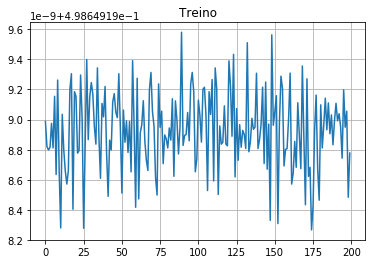

In [53]:
plt.title('Treino')
plt.grid(True)
plt.plot(running.history['acc'])
plt.show()

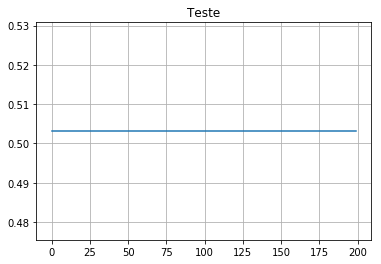

In [56]:
plt.title('Teste')
plt.grid(True)
plt.plot(running.history['val_acc'])
plt.show()

In [50]:
classifier = Sequential()

classifier.add(
    Dense(
        units=2,
        activation='sigmoid',
        kernel_initializer='random_normal',
        input_dim=X_train.shape[-1]
    )
)

classifier.add(
    Dense(
        units=3,
        activation='sigmoid',
        kernel_initializer='random_normal',
    )
)

classifier.add(
    Dense(
        units=3,
        activation='sigmoid',
        kernel_initializer='random_normal',
    )
)

classifier.add(
    Dense(
        units=1,
        activation='sigmoid',
        kernel_initializer='random_normal',
    )
)

In [51]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [52]:
run_2 = classifier.fit(X_train,y_train, batch_size=10, epochs=200, validation_data=(X_test, y_test))

Train on 17397 samples, validate on 7457 samples
Epoch 1/200
17397/17397 [==============================] - 3s 167us/step - loss: 0.6582 - acc: 0.6604 - val_loss: 0.5063 - val_acc: 0.8625
Epoch 2/200
17397/17397 [==============================] - 3s 152us/step - loss: 0.3370 - acc: 0.9029 - val_loss: 0.2087 - val_acc: 0.9485
Epoch 3/200
17397/17397 [==============================] - 3s 152us/step - loss: 0.1340 - acc: 0.9701 - val_loss: 0.0804 - val_acc: 0.9861
Epoch 4/200
17397/17397 [==============================] - 3s 149us/step - loss: 0.0561 - acc: 0.9929 - val_loss: 0.0378 - val_acc: 0.9965
Epoch 5/200
17397/17397 [==============================] - 3s 158us/step - loss: 0.0298 - acc: 0.9968 - val_loss: 0.0220 - val_acc: 0.9979
Epoch 6/200
17397/17397 [==============================] - 3s 150us/step - loss: 0.0191 - acc: 0.9975 - val_loss: 0.0160 - val_acc: 0.9981
Epoch 7/200
17397/17397 [==============================] - 3s 163us/step - loss: 0.0142 - acc: 0.9979 - val_loss: 0.0

17397/17397 [==============================] - 3s 145us/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0178 - val_acc: 0.9946
Epoch 59/200
17397/17397 [==============================] - 3s 144us/step - loss: 4.2827e-04 - acc: 0.9999 - val_loss: 1.4353e-04 - val_acc: 1.0000
Epoch 60/200
17397/17397 [==============================] - 3s 145us/step - loss: 1.4484e-04 - acc: 1.0000 - val_loss: 1.3234e-04 - val_acc: 1.0000
Epoch 61/200
17397/17397 [==============================] - 3s 144us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 6.1433e-04 - val_acc: 1.0000
Epoch 62/200
17397/17397 [==============================] - 3s 144us/step - loss: 5.7741e-04 - acc: 0.9998 - val_loss: 1.5102e-04 - val_acc: 1.0000
Epoch 63/200
17397/17397 [==============================] - 2s 144us/step - loss: 1.2998e-04 - acc: 1.0000 - val_loss: 1.1474e-04 - val_acc: 1.0000
Epoch 64/200
17397/17397 [==============================] - 3s 144us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 1.6452e-04 - val_acc: 

Epoch 114/200
17397/17397 [==============================] - 3s 145us/step - loss: 2.3434e-05 - acc: 1.0000 - val_loss: 2.2156e-05 - val_acc: 1.0000
Epoch 115/200
17397/17397 [==============================] - 3s 146us/step - loss: 2.1663e-05 - acc: 1.0000 - val_loss: 2.4286e-05 - val_acc: 1.0000
Epoch 116/200
17397/17397 [==============================] - 3s 146us/step - loss: 0.0030 - acc: 0.9993 - val_loss: 2.1368e-04 - val_acc: 1.0000
Epoch 117/200
17397/17397 [==============================] - 3s 145us/step - loss: 4.8081e-05 - acc: 1.0000 - val_loss: 2.7412e-05 - val_acc: 1.0000
Epoch 118/200
17397/17397 [==============================] - 3s 144us/step - loss: 2.4569e-05 - acc: 1.0000 - val_loss: 2.1737e-05 - val_acc: 1.0000
Epoch 119/200
17397/17397 [==============================] - 3s 146us/step - loss: 2.0419e-05 - acc: 1.0000 - val_loss: 1.7981e-05 - val_acc: 1.0000
Epoch 120/200
17397/17397 [==============================] - 3s 146us/step - loss: 1.8652e-05 - acc: 1.0000 - 

17397/17397 [==============================] - 3s 147us/step - loss: 7.5098e-06 - acc: 1.0000 - val_loss: 6.2775e-06 - val_acc: 1.0000
Epoch 170/200
17397/17397 [==============================] - 3s 146us/step - loss: 5.9911e-06 - acc: 1.0000 - val_loss: 5.5462e-06 - val_acc: 1.0000
Epoch 171/200
17397/17397 [==============================] - 3s 146us/step - loss: 5.3829e-06 - acc: 1.0000 - val_loss: 4.8247e-06 - val_acc: 1.0000
Epoch 172/200
17397/17397 [==============================] - 3s 146us/step - loss: 5.2045e-06 - acc: 1.0000 - val_loss: 4.7264e-06 - val_acc: 1.0000
Epoch 173/200
17397/17397 [==============================] - 3s 146us/step - loss: 0.0017 - acc: 0.9993 - val_loss: 1.5335e-05 - val_acc: 1.0000
Epoch 174/200
17397/17397 [==============================] - 3s 147us/step - loss: 1.5075e-05 - acc: 1.0000 - val_loss: 7.0773e-06 - val_acc: 1.0000
Epoch 175/200
17397/17397 [==============================] - 3s 154us/step - loss: 7.6224e-06 - acc: 1.0000 - val_loss: 4.81

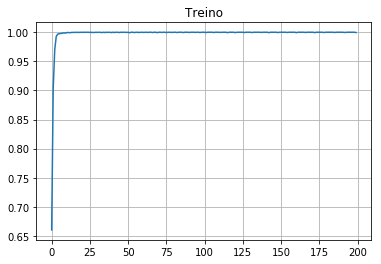

In [57]:
plt.title('Treino')
plt.grid(True)
plt.plot(run_2.history['acc'])
plt.show()

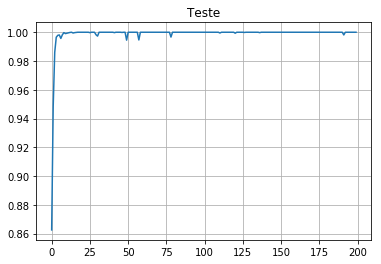

In [58]:
plt.title('Teste')
plt.grid(True)
plt.plot(run_2.history['val_acc'])
plt.show()

# MLP 2

In [64]:
'Linhas: {} | Colunas: {}'.format(df_test_over.shape[0], df_test_under.shape[1])

'Linhas: 87986 | Colunas: 17'

In [65]:
X = df_test_over.loc[:,[
    'MinTemp',
    'MaxTemp',
    'Rainfall',
    'Evaporation',
    'Sunshine',
    'WindGustSpeed',
    'Humidity3pm',
    'Pressure9am',
    'Pressure3pm',
    'Cloud9am',
    'Cloud3pm',
    'Temp9am',
    'Temp3pm',
    'RISK_MM'
]]
y = df_test_over.loc[:,['RainTomorrow']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [66]:
classifier = Sequential()

classifier.add(
    Dense(
        units=2,
        activation='relu',
        kernel_initializer='random_normal',
        input_dim=X_train.shape[-1]
    )
)

classifier.add(
    Dense(
        units=4,
        activation='relu',
        kernel_initializer='random_normal',
    )
)

classifier.add(
    Dense(
        units=4,
        activation='relu',
        kernel_initializer='random_normal',
    )
)

classifier.add(
    Dense(
        units=1,
        activation='relu',
        kernel_initializer='random_normal',
    )
)

In [67]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [68]:
run_3 = classifier.fit(X_train,y_train, batch_size=10, epochs=200, validation_data=(X_test, y_test))

Train on 61590 samples, validate on 26396 samples
Epoch 1/200
61590/61590 [==============================] - 10s 161us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 2/200
61590/61590 [==============================] - 9s 153us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 3/200
61590/61590 [==============================] - 9s 154us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 4/200
61590/61590 [==============================] - 9s 153us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 5/200
61590/61590 [==============================] - 9s 154us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 6/200
61590/61590 [==============================] - 9s 154us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 7/200
61590/61590 [==============================] - 10s 167us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 

Epoch 59/200
61590/61590 [==============================] - 9s 146us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 60/200
61590/61590 [==============================] - 9s 147us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 61/200
61590/61590 [==============================] - 10s 158us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 62/200
61590/61590 [==============================] - 10s 157us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 63/200
61590/61590 [==============================] - 10s 163us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 64/200
61590/61590 [==============================] - 8s 136us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 65/200
61590/61590 [==============================] - 9s 151us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 66/200
6159

61590/61590 [==============================] - 9s 153us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 118/200
61590/61590 [==============================] - 9s 152us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 119/200
61590/61590 [==============================] - 9s 153us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 120/200
61590/61590 [==============================] - 9s 153us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 121/200
61590/61590 [==============================] - 9s 152us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 122/200
61590/61590 [==============================] - 9s 154us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 123/200
61590/61590 [==============================] - 9s 154us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 124/200
61590/61590 [

Epoch 175/200
61590/61590 [==============================] - 10s 155us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 176/200
61590/61590 [==============================] - 10s 155us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 177/200
61590/61590 [==============================] - 10s 163us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 178/200
61590/61590 [==============================] - 10s 163us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 179/200
61590/61590 [==============================] - 10s 159us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 180/200
61590/61590 [==============================] - 9s 154us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 181/200
61590/61590 [==============================] - 10s 160us/step - loss: 8.0677 - acc: 0.4995 - val_loss: 8.0389 - val_acc: 0.5013
Epoch 1

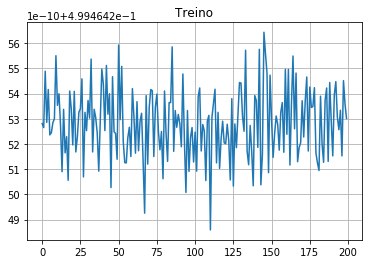

In [72]:
plt.title('Treino')
plt.grid(True)
plt.plot(run_3.history['acc'])
plt.show()

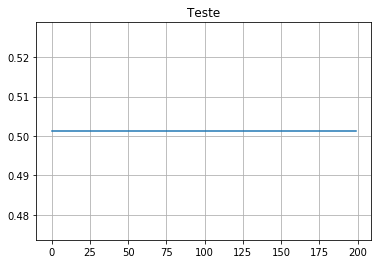

In [73]:
plt.title('Teste')
plt.grid(True)
plt.plot(run_3.history['val_acc'])
plt.show()

In [69]:
classifier = Sequential()

classifier.add(
    Dense(
        units=2,
        activation='sigmoid',
        kernel_initializer='random_normal',
        input_dim=X_train.shape[-1]
    )
)

classifier.add(
    Dense(
        units=3,
        activation='sigmoid',
        kernel_initializer='random_normal',
    )
)

classifier.add(
    Dense(
        units=3,
        activation='sigmoid',
        kernel_initializer='random_normal',
    )
)

classifier.add(
    Dense(
        units=1,
        activation='sigmoid',
        kernel_initializer='random_normal',
    )
)

In [70]:
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [71]:
run_4 = classifier.fit(X_train,y_train, batch_size=10, epochs=200, validation_data=(X_test, y_test))

Train on 61590 samples, validate on 26396 samples
Epoch 1/200
61590/61590 [==============================] - 10s 167us/step - loss: 0.3401 - acc: 0.8620 - val_loss: 0.0632 - val_acc: 0.9904
Epoch 2/200
61590/61590 [==============================] - 10s 167us/step - loss: 0.0287 - acc: 0.9962 - val_loss: 0.0144 - val_acc: 0.9955
Epoch 3/200
61590/61590 [==============================] - 10s 168us/step - loss: 0.0105 - acc: 0.9987 - val_loss: 0.0082 - val_acc: 0.9975
Epoch 4/200
61590/61590 [==============================] - 10s 164us/step - loss: 0.0068 - acc: 0.9995 - val_loss: 0.0071 - val_acc: 0.9975
Epoch 5/200
61590/61590 [==============================] - 10s 165us/step - loss: 0.0050 - acc: 0.9997 - val_loss: 0.0039 - val_acc: 0.9999
Epoch 6/200
61590/61590 [==============================] - 10s 169us/step - loss: 0.0038 - acc: 0.9999 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 7/200
61590/61590 [==============================] - 10s 162us/step - loss: 0.0029 - acc: 0.9999 - val_l

61590/61590 [==============================] - 10s 164us/step - loss: 7.7289e-04 - acc: 0.9999 - val_loss: 6.0181e-06 - val_acc: 1.0000
Epoch 57/200
61590/61590 [==============================] - 10s 161us/step - loss: 3.8221e-06 - acc: 1.0000 - val_loss: 2.7428e-06 - val_acc: 1.0000
Epoch 58/200
61590/61590 [==============================] - 10s 160us/step - loss: 5.0977e-04 - acc: 0.9999 - val_loss: 4.2664e-06 - val_acc: 1.0000
Epoch 59/200
61590/61590 [==============================] - 10s 160us/step - loss: 3.0400e-06 - acc: 1.0000 - val_loss: 2.3953e-06 - val_acc: 1.0000
Epoch 60/200
61590/61590 [==============================] - 10s 160us/step - loss: 5.2310e-04 - acc: 0.9999 - val_loss: 5.5857e-06 - val_acc: 1.0000
Epoch 61/200
61590/61590 [==============================] - 10s 167us/step - loss: 3.0643e-06 - acc: 1.0000 - val_loss: 2.1285e-06 - val_acc: 1.0000
Epoch 62/200
61590/61590 [==============================] - 10s 165us/step - loss: 8.1320e-04 - acc: 0.9999 - val_loss:

61590/61590 [==============================] - 10s 160us/step - loss: 2.1811e-07 - acc: 1.0000 - val_loss: 1.8778e-07 - val_acc: 1.0000
Epoch 112/200
61590/61590 [==============================] - 10s 165us/step - loss: 0.0020 - acc: 0.9997 - val_loss: 5.7783e-07 - val_acc: 1.0000
Epoch 113/200
61590/61590 [==============================] - 10s 159us/step - loss: 4.9714e-07 - acc: 1.0000 - val_loss: 2.6989e-07 - val_acc: 1.0000
Epoch 114/200
61590/61590 [==============================] - 10s 159us/step - loss: 2.2351e-07 - acc: 1.0000 - val_loss: 1.8583e-07 - val_acc: 1.0000
Epoch 115/200
61590/61590 [==============================] - 10s 165us/step - loss: 2.7073e-04 - acc: 1.0000 - val_loss: 1.7781e-06 - val_acc: 1.0000
Epoch 116/200
61590/61590 [==============================] - 11s 171us/step - loss: 6.4508e-07 - acc: 1.0000 - val_loss: 2.5917e-07 - val_acc: 1.0000
Epoch 117/200
61590/61590 [==============================] - 10s 165us/step - loss: 1.9419e-07 - acc: 1.0000 - val_los

Epoch 166/200
61590/61590 [==============================] - 10s 161us/step - loss: 2.3345e-04 - acc: 0.9999 - val_loss: 3.3828e-07 - val_acc: 1.0000
Epoch 167/200
61590/61590 [==============================] - 10s 163us/step - loss: 2.1319e-07 - acc: 1.0000 - val_loss: 1.3290e-07 - val_acc: 1.0000
Epoch 168/200
61590/61590 [==============================] - 10s 163us/step - loss: 1.2380e-07 - acc: 1.0000 - val_loss: 1.1589e-07 - val_acc: 1.0000
Epoch 169/200
61590/61590 [==============================] - 10s 162us/step - loss: 1.1516e-07 - acc: 1.0000 - val_loss: 1.1729e-07 - val_acc: 1.0000
Epoch 170/200
61590/61590 [==============================] - 10s 163us/step - loss: 6.0490e-04 - acc: 0.9999 - val_loss: 5.9267e-07 - val_acc: 1.0000
Epoch 171/200
61590/61590 [==============================] - 10s 164us/step - loss: 3.2901e-07 - acc: 1.0000 - val_loss: 1.8300e-07 - val_acc: 1.0000
Epoch 172/200
61590/61590 [==============================] - 10s 163us/step - loss: 1.4440e-07 - acc

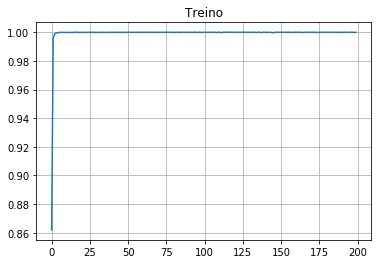

In [74]:
plt.title('Treino')
plt.grid(True)
plt.plot(run_4.history['acc'])
plt.show()

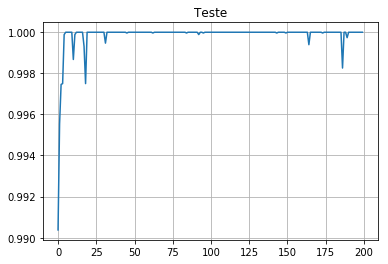

In [75]:
plt.title('Teste')
plt.grid(True)
plt.plot(run_4.history['val_acc'])
plt.show()